In [1]:
# will run for a few minutes
!pip install odefinterp --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.6/85.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 58.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 1.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 83.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 64.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.0 MB/s eta 0

In [2]:
import odeformer
from odeformer.model import SymbolicTransformerRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import torch, json
import numpy as np

In [3]:
dstr = SymbolicTransformerRegressor(from_pretrained=True)
# i'll suggest you keep the beam size low. you'll know why.
model_args = {'beam_size':5, 'beam_temperature':0.1}
dstr.set_model_args(model_args)

Downloading...
From (original): https://drive.google.com/uc?id=1L_UZ0qgrBVkRuhg5j3BQoGxlvMk_Pm1W
From (redirected): https://drive.google.com/uc?id=1L_UZ0qgrBVkRuhg5j3BQoGxlvMk_Pm1W&confirm=t&uuid=3e6b8467-bc51-425c-bce5-6a731c71e9ef
To: /kaggle/working/odeformer.pt
100%|██████████| 465M/465M [00:03<00:00, 149MB/s]  


Loaded pretrained model


In [4]:
# first example
times = np.linspace(0, 10, 25)
x = 2.3 * np.cos(times + 0.5)
y = 1.2 * np.sin(times + 0.1)
trajectory = np.stack([x, y], axis=1)  # (time, state) format

In [9]:
# second example (was supposed to be the easiest until noise entered the chat)
times = np.linspace(0, 10, 50)
x0_init = 1.0
x1_init = 2.0
c0 = 0.5
c1 = -0.3

# trajectories
#x0 = x0_init * np.exp(c0 * times)  # x_0(t) = x_0(0) * exp(c0 * t)
x1 = x1_init * np.exp(c1 * times)  # x_1(t) = x_1(0) * exp(c1 * t)
trajectory = np.stack([x1], axis=1)

Skipping encoder block...
Skipping suspicious single beam business...
Skipping suspicious single beam business...
Skipping suspicious single beam business...
Skipping suspicious single beam business...
Skipping suspicious single beam business...
Skipping suspicious single beam business...


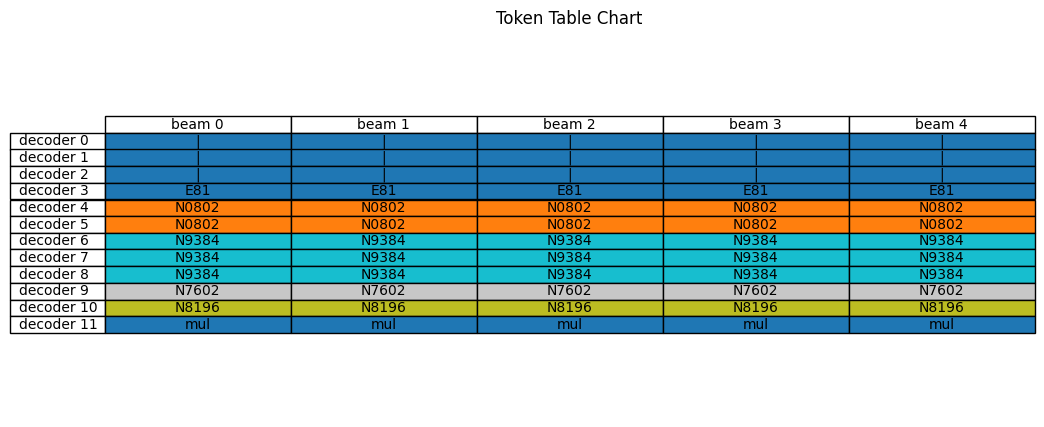

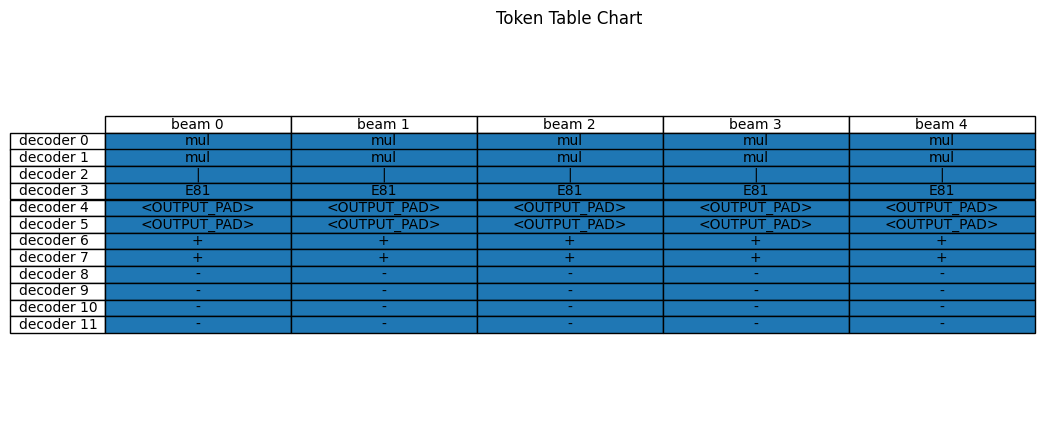

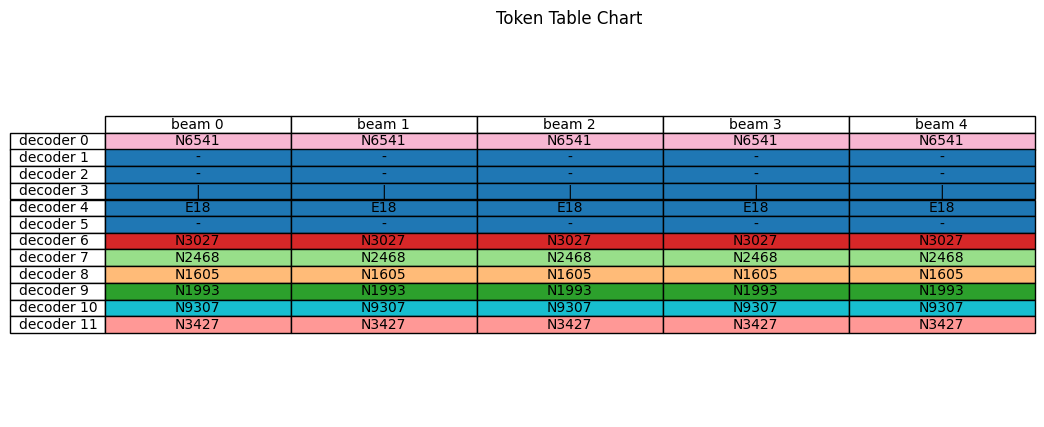

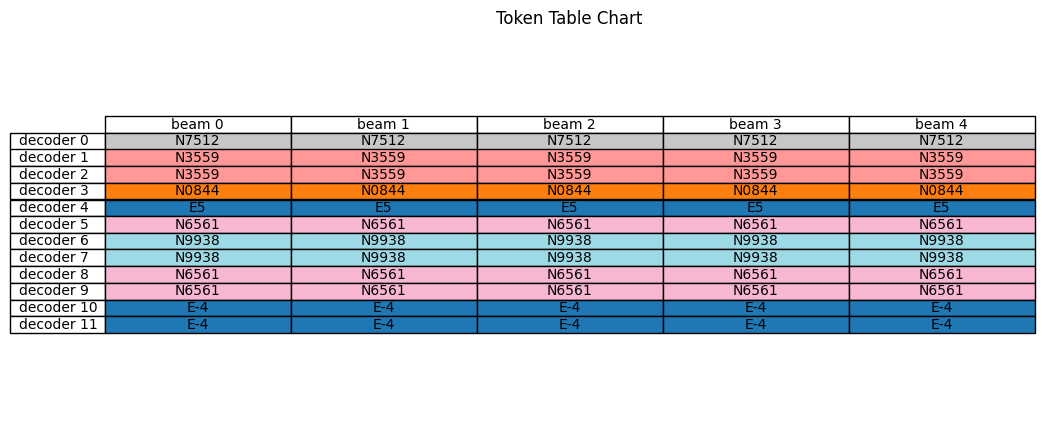

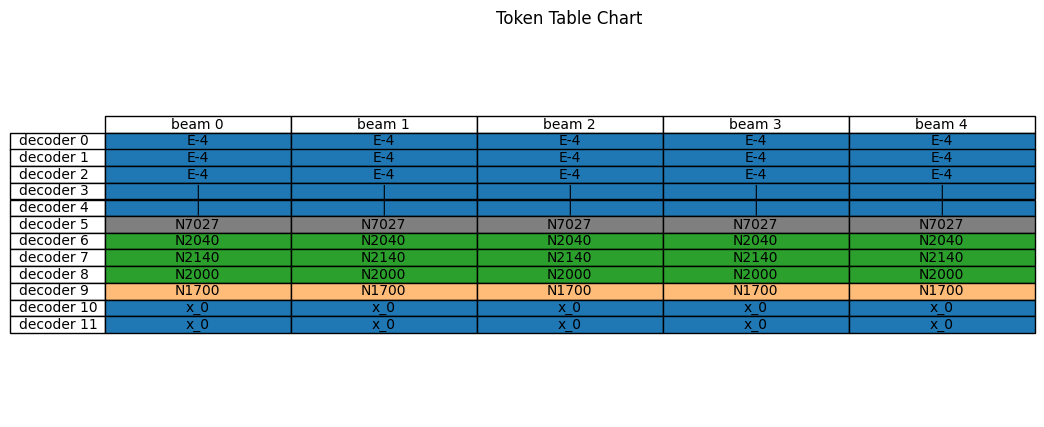

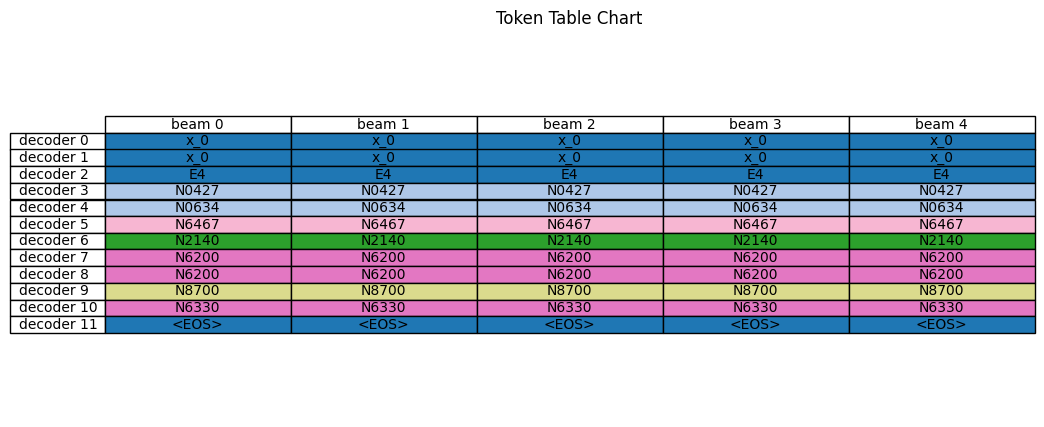

x_0' = -0.3084 * x_0
R2 Score: 0.9991719997320817


In [10]:
candidates = dstr.fit(times, trajectory)
dstr.print(n_predictions=1)
pred_trajectory = dstr.predict(times, trajectory[0])

# evaluating prediction using R2 score
from odeformer.metrics import r2_score
print("R2 Score:", r2_score(trajectory, pred_trajectory))

In [13]:
# size is (n_tokens, n_layers, beam_size)
intermediate_tokens = list(dstr.get_intermediate_tokens().values())
intermediate_tokens[-1]

[[0, ['N1010', 'N1010', 'x_0', 'N1010', 'N1010']],
 [1, ['N1010', 'N1010', 'x_0', 'N1010', 'N1010']],
 [2, ['N1010', 'N1010', 'E4', 'N1010', 'N1010']],
 [3, ['N1010', 'N1010', 'N0704', 'N1010', 'N1010']],
 [4, ['N1010', 'N1010', 'N0802', 'N1010', 'N1010']],
 [5, ['N1010', 'N1010', 'N0802', 'N1010', 'N1010']],
 [6, ['N1010', 'N1010', 'N7526', 'N1010', 'N1010']],
 [7, ['N1010', 'N1010', 'N3810', 'N1010', 'N1010']],
 [8, ['N1010', 'N1010', 'N1009', 'N1010', 'N1010']],
 [9, ['N1010', 'N1010', 'N1009', 'N1010', 'N1010']],
 [10, ['N1010', 'N1010', '<EOS>', 'N1010', 'N1010']],
 [11, ['N1010', 'N1010', '<EOS>', 'N1010', 'N1010']]]

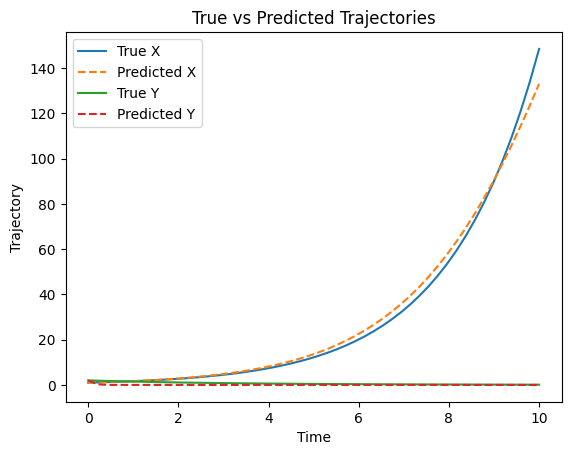

In [7]:
plt.plot(times, trajectory[:, 0], label='True X')
plt.plot(times, pred_trajectory[:, 0], label='Predicted X', linestyle='--')
plt.plot(times, trajectory[:, 1], label='True Y')
plt.plot(times, pred_trajectory[:, 1], label='Predicted Y', linestyle='--')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Trajectory')
plt.title('True vs Predicted Trajectories')
plt.show()